In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Loading Data

In [2]:
# Load DAT file as pandas dataset
data = pd.read_csv('../Data/column_2C.dat',sep=" ",header=None, names=['pel_inc','pel_tilt','lumb_angle', 'sac_slope','pel_radius','spondy_grade','class'])
print(data)

     pel_inc  pel_tilt  lumb_angle  sac_slope  pel_radius  spondy_grade class
0      63.03     22.55       39.61      40.48       98.67         -0.25    AB
1      39.06     10.06       25.02      29.00      114.41          4.56    AB
2      68.83     22.22       50.09      46.61      105.99         -3.53    AB
3      69.30     24.65       44.31      44.64      101.87         11.21    AB
4      49.71      9.65       28.32      40.06      108.17          7.92    AB
..       ...       ...         ...        ...         ...           ...   ...
305    47.90     13.62       36.00      34.29      117.45         -4.25    NO
306    53.94     20.72       29.22      33.22      114.37         -0.42    NO
307    61.45     22.69       46.17      38.75      125.67         -2.71    NO
308    45.25      8.69       41.58      36.56      118.55          0.21    NO
309    33.84      5.07       36.64      28.77      123.95         -0.20    NO

[310 rows x 7 columns]


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pel_inc       310 non-null    float64
 1   pel_tilt      310 non-null    float64
 2   lumb_angle    310 non-null    float64
 3   sac_slope     310 non-null    float64
 4   pel_radius    310 non-null    float64
 5   spondy_grade  310 non-null    float64
 6   class         310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,pel_inc,pel_tilt,lumb_angle,sac_slope,pel_radius,spondy_grade
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [4]:
#binary encoding: assign 1 to AB and 0 to NO
data['class']=data['class'].map({'AB':1,'NO':0})
#separate independent and dependent variables
x = data.iloc[:,:6]
y = data['class']
data

,pel_inc,pel_tilt,lumb_angle,sac_slope,pel_radius,spondy_grade,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


# Data visualization

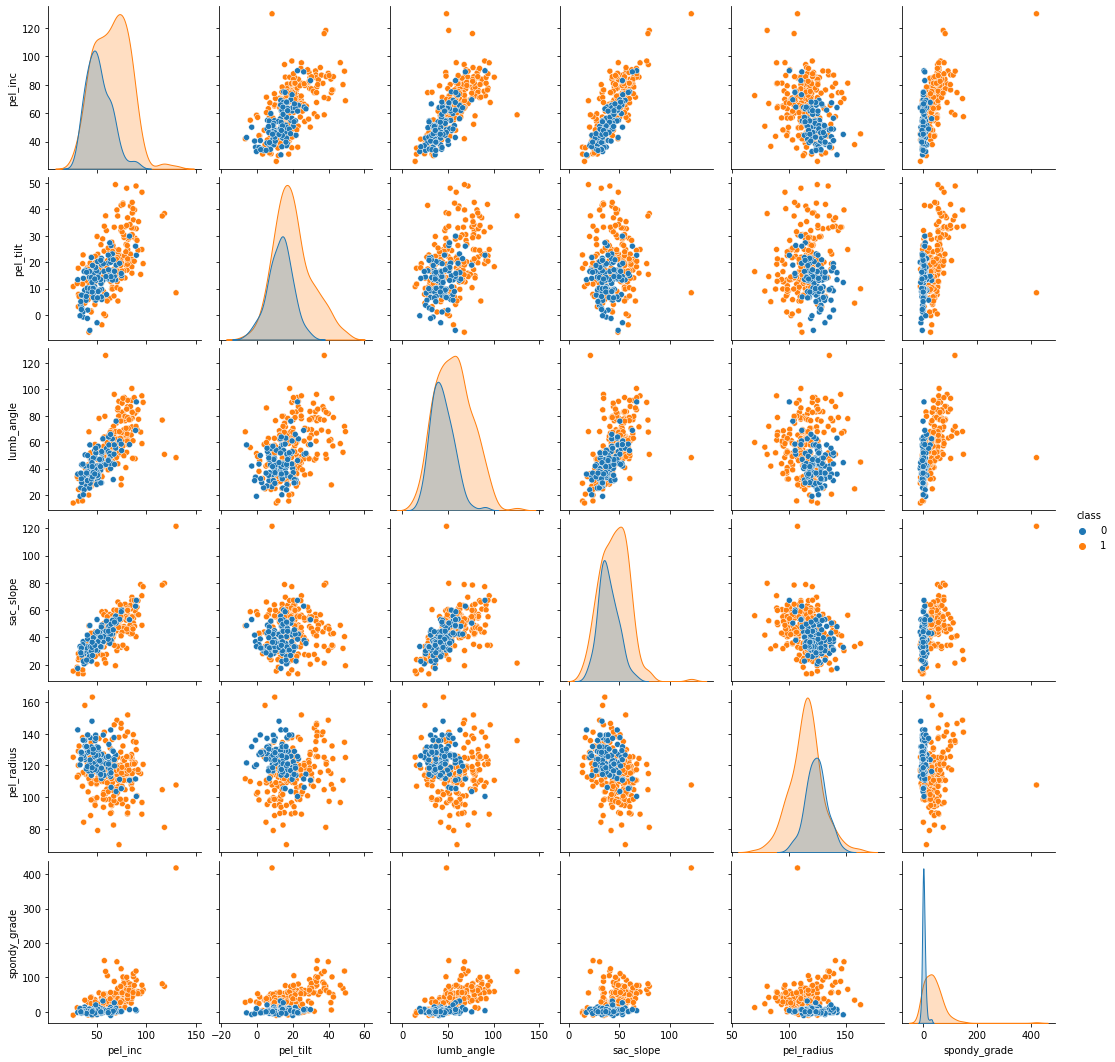

In [5]:
# (b)i.Pairwise scatterplots
import seaborn as sns
sns.pairplot(data, hue='class')

<AxesSubplot:xlabel='class', ylabel='pel_inc'>

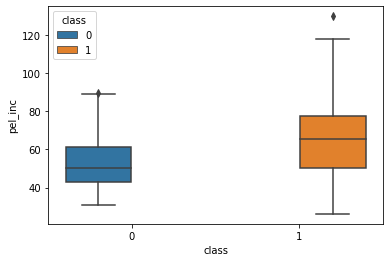

In [6]:
# (b)ii
#boxplot 1
sns.boxplot(x=data['class'],y=data['pel_inc'],hue=data['class'])

<AxesSubplot:xlabel='class', ylabel='pel_tilt'>

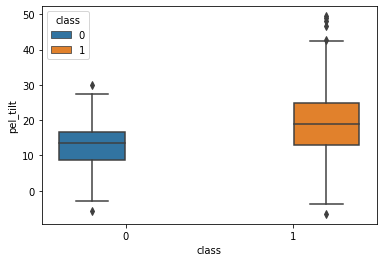

In [7]:
#boxplot 2
sns.boxplot(x=data['class'],y=data['pel_tilt'],hue=data['class'])

<AxesSubplot:xlabel='class', ylabel='lumb_angle'>

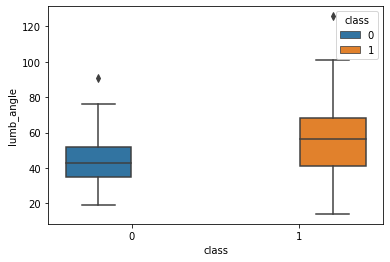

In [8]:
#boxplot 3
sns.boxplot(x=data['class'],y=data['lumb_angle'],hue=data['class'])

<AxesSubplot:xlabel='class', ylabel='sac_slope'>

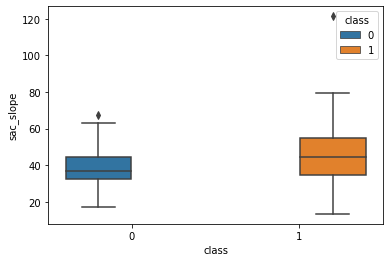

In [9]:
#boxplot 4
sns.boxplot(x=data['class'],y=data['sac_slope'],hue=data['class'])

<AxesSubplot:xlabel='class', ylabel='pel_radius'>

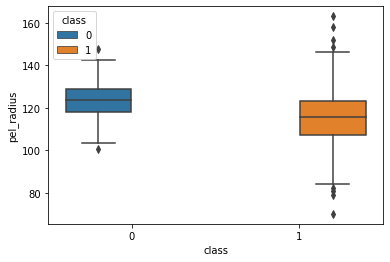

In [10]:
#boxplot 5
sns.boxplot(x=data['class'],y=data['pel_radius'],hue=data['class'])

<AxesSubplot:xlabel='class', ylabel='spondy_grade'>

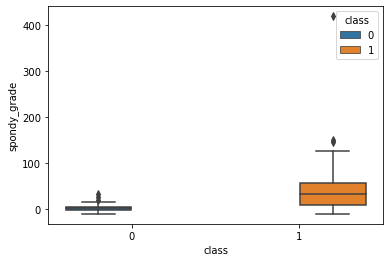

In [11]:
#boxplot 6
sns.boxplot(x=data['class'],y=data['spondy_grade'],hue=data['class'])

# Using KNN for Classification

In [12]:
#(b)iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set 
# and the rest of the data as the test set.
from sklearn.model_selection import train_test_split
data_0 = data[data['class'] == 0]
data_1 = data[data['class'] == 1]
data_0_x = data_0.iloc[:,:6]
data_0_y = data_0.iloc[:,6]
data_1_x = data_1.iloc[:,:6]
data_1_y = data_1.iloc[:,6]

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(data_0_x, data_0_y, train_size = 70, random_state = 0)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(data_1_x, data_1_y, train_size = 140, random_state = 0)
X_train = pd.concat([X_0_train,X_1_train])
y_train = pd.concat([y_0_train,y_1_train])
X_test = pd.concat([X_0_test,X_1_test])
y_test = pd.concat([y_0_test,y_1_test])

In [61]:
#(c)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix

accuracies = []
error = []

for i in range(208,0,-3):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    error.append(np.mean(y_pred != y_test))
    accuracies.append(accuracy_score(y_test,y_pred))

print(accuracies)
print(error)

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.73, 0.76, 0.76, 0.78, 0.77, 0.79, 0.78, 0.8, 0.79, 0.79, 0.78, 0.79, 0.78, 0.79, 0.78, 0.78, 0.78, 0.79, 0.79, 0.79, 0.79, 0.8, 0.79, 0.8, 0.79, 0.79, 0.8, 0.82, 0.82, 0.82, 0.84, 0.82, 0.82, 0.83, 0.82, 0.85, 0.85, 0.87, 0.86, 0.87, 0.86, 0.86, 0.87, 0.84, 0.83, 0.81]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.27, 0.24, 0.24, 0.22, 0.23, 0.21, 0.22, 0.2, 0.21, 0.21, 0.22, 0.21, 0.22, 0.21, 0.22, 0.22, 0.22, 0.21, 0.21, 0.21, 0.21, 0.2, 0.21, 0.2, 0.21, 0.21, 0.2, 0.18, 0.18, 0.18, 0.16, 0.18, 0.18, 0.17, 0.18, 0.15, 0.15, 0.13, 0.14, 0.13, 0.14, 0.14, 0.13, 0.16, 0.17, 0.19]


Text(0, 0.5, 'Mean Error')

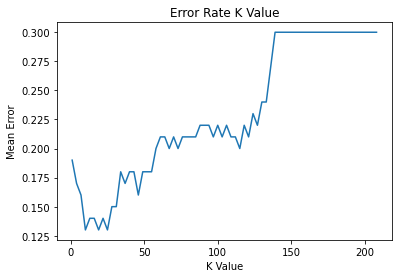

In [95]:
# plot error values against K values
plt.plot(range(208,0,-3), error)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
#finding k*
index=np.argmax(accuracies)
k_num = list(range(208,0,-3))
print("The most suitable k* is "+ str(k_num[index]))

The most suitable k* is 25


In [71]:
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors = 25)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("confusion matrix: \n"+str(confusion_matrix(y_test,y_pred)))
print("True positive rate: "+str(27/(27+10)))
print("True negative rate: "+str(60/(60+3)))
print("Precision: "+str(27/(27+3)))
print("f1_score: " + str(f1_score(y_test, y_pred, average=None)))


confusion matrix: 
[[27  3]
 [10 60]]
True positive rate: 0.7297297297297297
True negative rate: 0.9523809523809523
Precision: 0.9
f1_score: [0.80597015 0.90225564]


In [89]:
#(c)iii Find the best accuracy at different size of test sample
accuracies_best = []
for n in range(10,211,10):
    X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(data_0_x, data_0_y, train_size = round(n/3), random_state = 0)
    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(data_1_x, data_1_y, train_size = (n-round(n/3)), random_state = 0)
    X_train = pd.concat([X_0_train,X_1_train])
    y_train = pd.concat([y_0_train,y_1_train])
    X_test = pd.concat([X_0_test,X_1_test])
    y_test = pd.concat([y_0_test,y_1_test])
    n_accuracies = []
    for i in range(1,n,5):
        n_classifier = KNeighborsClassifier(n_neighbors=i,p=2)
        n_classifier.fit(X_train, y_train)
        
        y_pred = n_classifier.predict(X_test)
        n_accuracies.append(accuracy_score(y_test,y_pred))
    accuracies_best.append(max(n_accuracies))
print(accuracies_best)
        

[0.8333333333333334, 0.8206896551724138, 0.8214285714285714, 0.8296296296296296, 0.7846153846153846, 0.78, 0.7833333333333333, 0.8043478260869565, 0.8136363636363636, 0.8333333333333334, 0.835, 0.8473684210526315, 0.8555555555555555, 0.8470588235294118, 0.86875, 0.8666666666666667, 0.8857142857142857, 0.8846153846153846, 0.8916666666666667, 0.8909090909090909, 0.88]


Text(0, 0.5, 'Optimal accuracy rate')

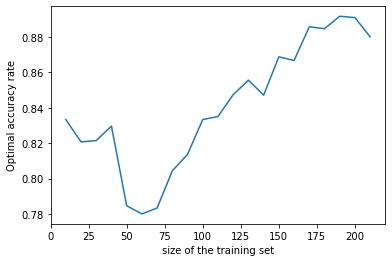

In [97]:
# plot the learning curve
plt.plot(range(10,211,10), accuracies_best)
plt.xlabel('size of the training set')
plt.ylabel('Optimal accuracy rate')